## 머신 러닝
- 주어진 데이터를 분석하여 규칙성, 패턴 등을 찾고, 이를 이용하여 의미 있는 정보를 추출하는 과정

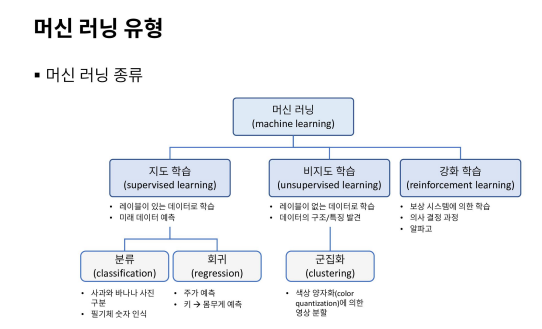

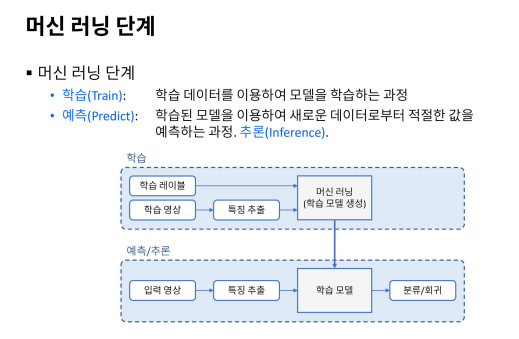

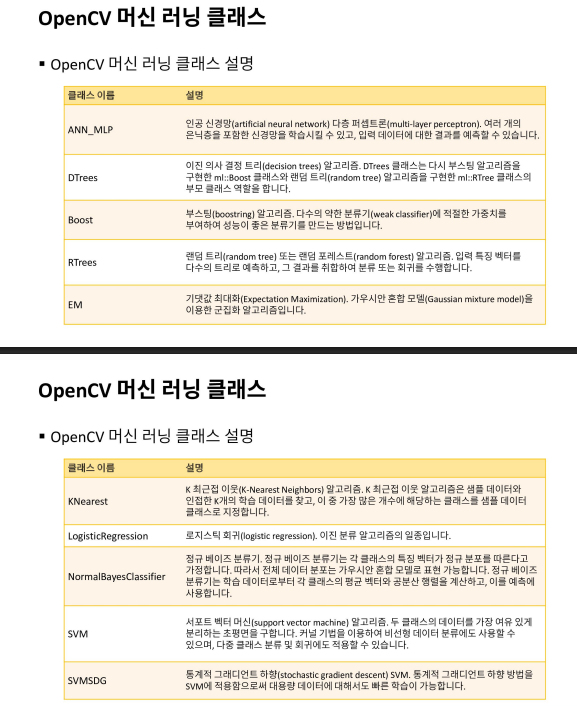

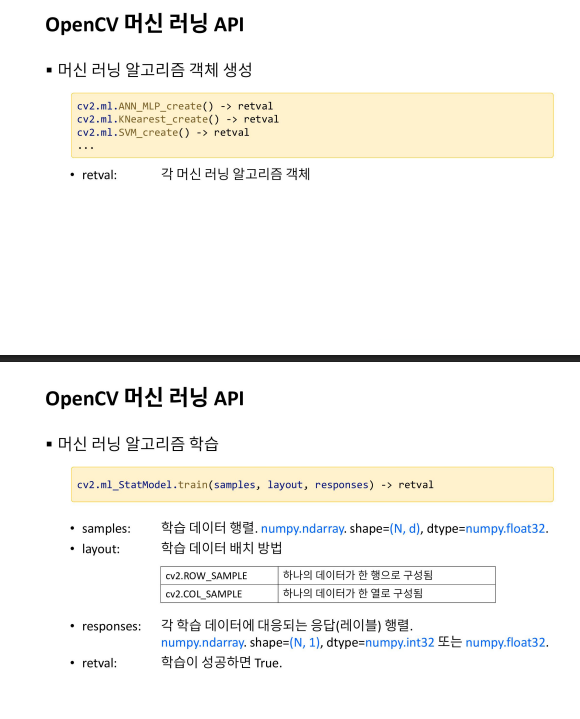

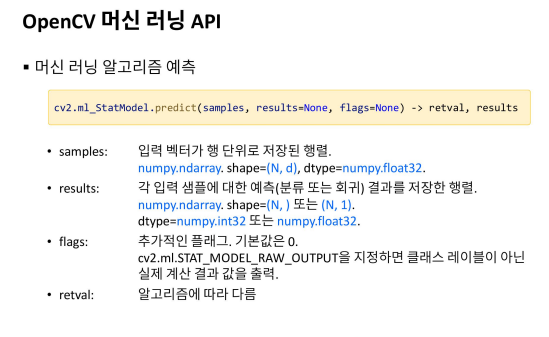

### k 최근접 이웃 알고리즘
- 특징 공간에서 테스트 데이터와 가장 가까이 있는 k개의 학습 데이터를 찾아 분류 또는 회귀를 수행하는 지도 학습 알고리즘의 하나

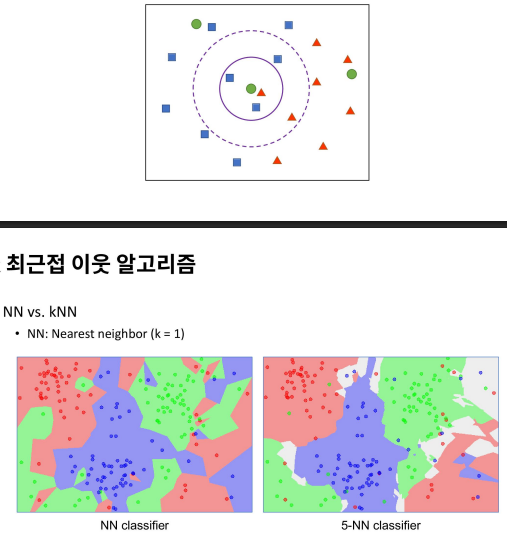

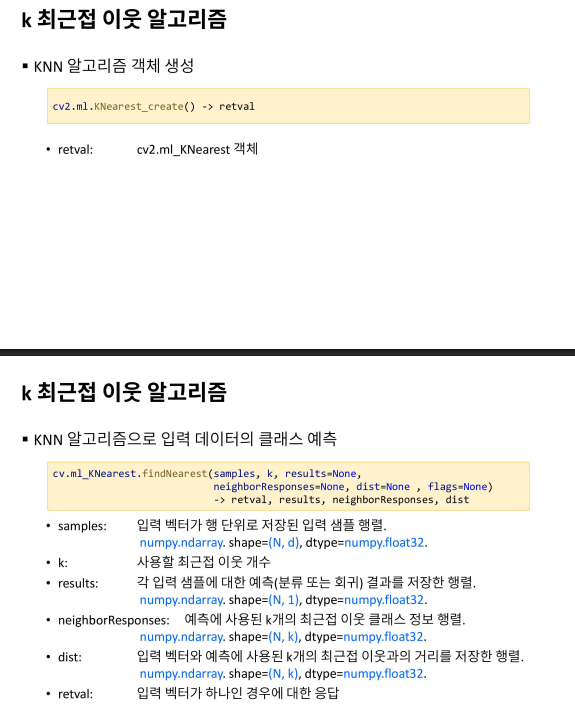

In [ ]:
# KNN 알고리즘 점 분류 예제

import numpy as np
import cv2


def on_k_changed(pos): # 트랙바 설치 트랙바에대한 콜백함수
    global k_value

    k_value = pos
    if k_value < 1:
        k_value = 1

    trainAndDisplay()


def addPoint(x, y, c):
    train.append([x, y])
    label.append([c])


def trainAndDisplay():
    '''  ## 주석 지우고 보여줌'''
    trainData = np.array(train, dtype=np.float32)
    labelData = np.array(label, dtype=np.int32)

    knn.train(trainData, cv2.ml.ROW_SAMPLE, labelData)

    ####### 여기서부터 디스플레이를 위해 작성한 함수
    h, w = img.shape[:2]
    for y in range(h):
        for x in range(w):
            sample = np.array([[x, y]]).astype(np.float32)

            ret, _, _, _ = knn.findNearest(sample, k_value)

            ret = int(ret)
            if ret == 0:
                img[y, x] = (128, 128, 255)
            elif ret == 1:
                img[y, x] = (128, 255, 128)
            elif ret == 2:
                img[y, x] = (255, 128, 128)
    
    
    for i in range(len(train)):
        x, y = train[i]
        l = label[i][0]

        if l == 0:
            cv2.circle(img, (x, y), 5, (0, 0, 128), -1, cv2.LINE_AA)
        elif l == 1:
            cv2.circle(img, (x, y), 5, (0, 128, 0), -1, cv2.LINE_AA)
        elif l == 2:
            cv2.circle(img, (x, y), 5, (128, 0, 0), -1, cv2.LINE_AA)

    cv2.imshow('knn', img)

###### 2차원 평면상에 점을 찍고 점들을 3개의 클래스로 구분하는 프로그램
# 학습 데이터 & 레이블
train = []  ###### 2차원 좌표 여러개 집어넣을거임(90개)
label = []  ###### 90개의 데이터에 대한 레이블

k_value = 1
img = np.full((500, 500, 3), 255, np.uint8) # 500x500 모두 흰색(255)
knn = cv2.ml.KNearest_create() # k-NN 생성

# 랜덤 데이터 생성
NUM = 30
rn = np.zeros((NUM, 2), np.int32)         ##########30행 2열  60개의 Element에 대한 랜덤넘버 제네레이션

# (150, 150) 근방의 점은 0번 클래스로 설정
cv2.randn(rn, 0, 50)            ########### 가우시안 형태 넘버를 생성해주는 함수
for i in range(NUM):
    addPoint(rn[i, 0] + 150, rn[i, 1] + 150, 0)      ######### (x,y, 이점의 클래스)  (150, 150 ) +50 근방에 생성 라벨은 0

# (350, 150) 근방의 점은 1번 클래스로 설정  라벨 1번
cv2.randn(rn, 0, 50)
for i in range(NUM):
    addPoint(rn[i, 0] + 350, rn[i, 1] + 150, 1)

# (250, 400) 근방의 점은 2번 클래스로 설정
cv2.randn(rn, 0, 70)
for i in range(NUM):
    addPoint(rn[i, 0] + 250, rn[i, 1] + 400, 2)

# 영상 출력 창 생성 & 트랙바 생성
cv2.namedWindow('knn')
cv2.createTrackbar('k_value', 'knn', 1, 5, on_k_changed)

# KNN 결과 출력
trainAndDisplay()

cv2.waitKey()
cv2.destroyAllWindows()


### KNN 필기체 숫자 인식

In [ ]:
import sys
import numpy as np
import cv2

# 전역 변수
oldx, oldy = -1, -1

# 마우스 콜백 함수
def on_mouse(event, x, y, flags, _):
    global oldx, oldy

    if event == cv2.EVENT_LBUTTONDOWN:
        oldx, oldy = x, y

    elif event == cv2.EVENT_LBUTTONUP:
        oldx, oldy = -1, -1

    elif event == cv2.EVENT_MOUSEMOVE:
        if flags & cv2.EVENT_FLAG_LBUTTON:
            cv2.line(img, (oldx, oldy), (x, y), (255, 255, 255), 40, cv2.LINE_AA)
            oldx, oldy = x, y
            cv2.imshow('img', img)


# 학습 & 레이블 행렬 생성

digits = cv2.imread('images/digits.png', cv2.IMREAD_GRAYSCALE)

if digits is None:
    print('Image load failed!')
    sys.exit()

h, w = digits.shape[:2]

cells = [np.hsplit(row, w//20) for row in np.vsplit(digits, h//20)]
cells = np.array(cells)
print('cells shape: ', cells.shape)
train_images = cells.reshape(-1, 400).astype(np.float32)
print ('trains_images.shpae:', train_images.shape)
train_labels = np.repeat(np.arange(10), len(train_images)/10)
print('train_labels', train_labels)
print('tain_labels.shape', train_labels.shape)
# KNN 학습

knn = cv2.ml.KNearest_create()
knn.train(train_images, cv2.ml.ROW_SAMPLE, train_labels) # k 최근접 알고리즘으로 학습
# train() 함수는 (입력 데이터, 행 샘플 기준, 라벨) 을 받음

# 사용자 입력 영상에 대해 예측

img = np.zeros((400, 400), np.uint8)

cv2.imshow('img', img)
cv2.setMouseCallback('img', on_mouse)

while True:
    key = cv2.waitKey()

    if key == 27:
        break
    elif key == ord(' '):
        test_image = cv2.resize(img, (20, 20), interpolation=cv2.INTER_AREA)
        test_image = test_image.reshape(-1, 400).astype(np.float32)

        ret, _, _, _ = knn.findNearest(test_image, 5)
        print(int(ret))

        img.fill(0)
        cv2.imshow('img', img)

cv2.destroyAllWindows()


cells shape:  (50, 100, 20, 20)
trains_images.shpae: (5000, 400)
train_labels [0 0 0 ... 9 9 9]
tain_labels.shape (5000,)
3


### 서포트 벡터 머신(SVM) 알고리즘
- 기본적으로 두 개의 그룹(데이터)을 분리하는 방법으로 데이터들과 거리가 가장 먼 초평면(hyperplane)을 선택하여 분리하는 방법

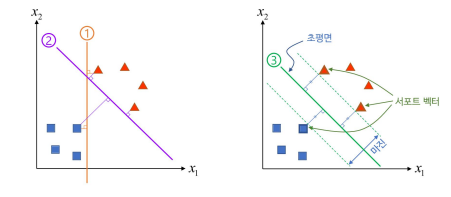

#### 비선형 데이터 분리하기
- SVM은 선형 분류 알고리즘 -> 하지만 실제 데이터는 비선형으로 분포할 수 있음
- 비선형 데이터의 차원을 확장하면 선형으로 분리 가능
- 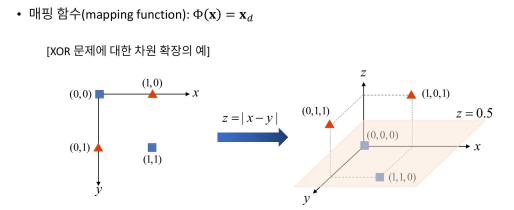

#### 커널 트릭(kernel trick)
- 매핑 함수를 직접 사용하는 대신 SVM 초평면 계산에서 사용되는 벡터 내적 연산을 대체하는 비선형 커널 함수를 정의하여 사용

#### 주요 커널 함수
- 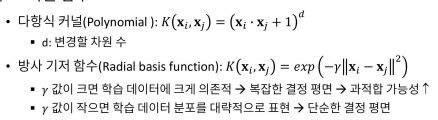

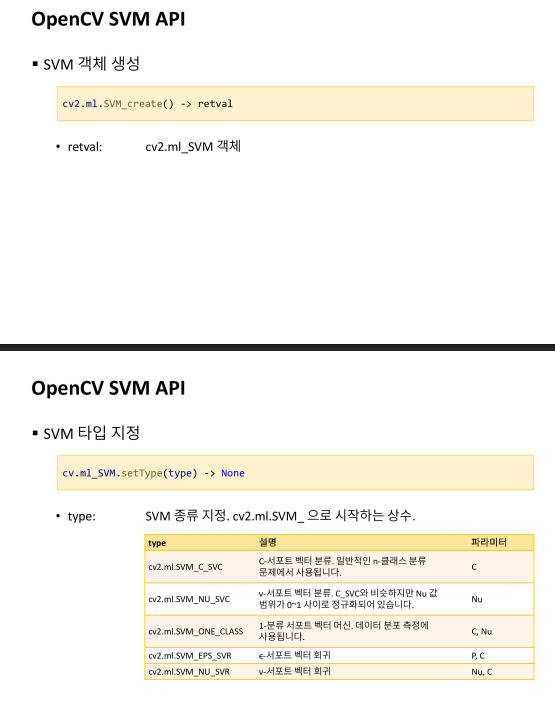

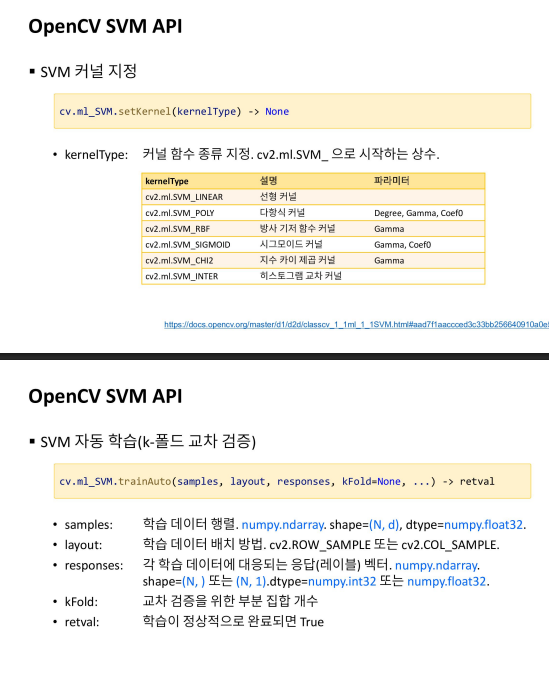

C: 0.1
Gamma: 1.0
C: 2.5
Gamma: 1e-05


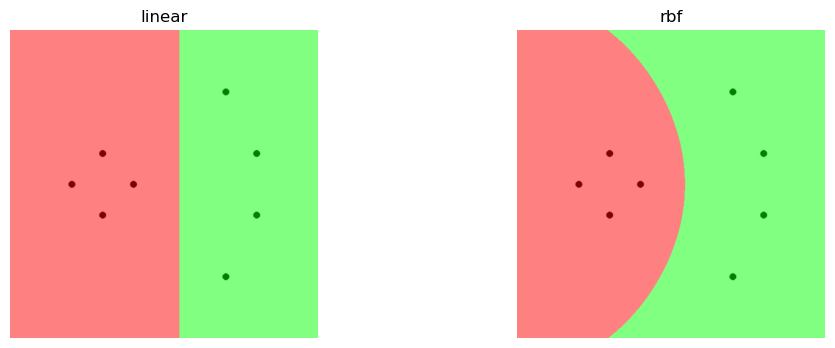

In [11]:
# SVM 알고리즘 점 분류 예제
import numpy as np
import cv2
import matplotlib.pyplot as plt

trains = np.array([[150, 200], [200, 250],
                   [100, 250], [150, 300],
                   [350, 100], [400, 200],
                   [400, 300], [350, 400]], dtype=np.float32)

labels = np.array([0, 0, 0, 0, 1, 1, 1, 1])

svm_linear = cv2.ml.SVM_create()
svm_rbf = cv2.ml.SVM_create()

# SVM 종류와 커널 종류 설정
svm_linear.setType(cv2.ml.SVM_C_SVC)
svm_linear.setKernel(cv2.ml.SVM_LINEAR)
svm_rbf.setType(cv2.ml.SVM_C_SVC)
svm_rbf.setKernel(cv2.ml.SVM_RBF) # 커널 설정할 때 재할당하면 None이 되어버리니까 그냥 호출만

svm_linear.trainAuto(trains, cv2.ml.ROW_SAMPLE, labels)
svm_rbf.trainAuto(trains, cv2.ml.ROW_SAMPLE, labels)

print('C:', svm_linear.getC())
print('Gamma:', svm_linear.getGamma())
print('C:', svm_rbf.getC())
print('Gamma:', svm_rbf.getGamma())

w, h = 500, 500
img1 = np.zeros((h, w, 3), dtype=np.uint8)
img2 = np.zeros((h, w, 3), dtype=np.uint8)

for y in range(h):
    for x in range(w):
        test = np.array([[x, y]], dtype=np.float32)
        _, res1 = svm_linear.predict(test)
        _, res2 = svm_rbf.predict(test)
        ret1 = int(res1[0, 0])
        ret2 = int(res2[0, 0])
        
        if ret1 == 0:
            img1[y, x] = (128, 128, 255) # Red
        else:
            img1[y, x] = (128, 255, 128) # Green
            
        if ret2 == 0:
            img2[y, x] = (128, 128, 255) # Red
        else:
            img2[y, x] = (128, 255, 128) # Green
            
color = [(0, 0, 128), (0, 128, 0)]
for i in range(trains.shape[0]):
    x = int(trains[i, 0])
    y = int(trains[i, 1])
    l = labels[i]
    cv2.circle(img1, (x, y), 5, color[l], -1, cv2.LINE_AA)
    cv2.circle(img2, (x, y), 5, color[l], -1, cv2.LINE_AA)
    
# cv2.imshow('svm', img)
# cv2.waitKey()
# cv2.destroyAllWindows()

plt.figure(figsize=(12,4))
plt.subplot(121), plt.title('linear'), plt.axis('off'), plt.imshow(cv2.cvtColor(img1, cv2.COLOR_BGR2RGB))
plt.subplot(122), plt.title('rbf'), plt.axis('off'), plt.imshow(cv2.cvtColor(img2, cv2.COLOR_BGR2RGB))
plt.show() 

### HOG & SVM 필기체 숫자 인식

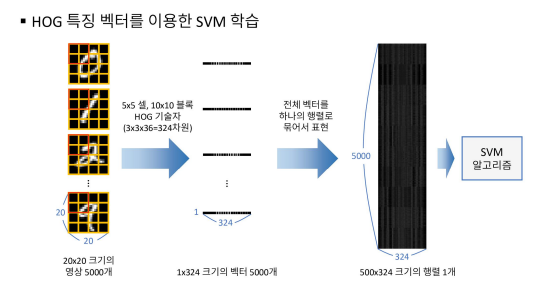

In [17]:
# HOG & SVM 필기체 숫자 인식 예제

import sys
import numpy as np
import cv2


oldx, oldy = -1, -1


def on_mouse(event, x, y, flags, _):
    global oldx, oldy

    if event == cv2.EVENT_LBUTTONDOWN:
        oldx, oldy = x, y

    elif event == cv2.EVENT_LBUTTONUP:
        oldx, oldy = -1, -1

    elif event == cv2.EVENT_MOUSEMOVE:
        if flags & cv2.EVENT_FLAG_LBUTTON:
            # cv2.line(그릴 대상, 시작점과 끝점 좌표, 색상, 선의 두께, 선의 종류)
            cv2.line(img, (oldx, oldy), (x, y), (255, 255, 255), 20, cv2.LINE_AA)
            oldx, oldy = x, y
            cv2.imshow('img', img)


######### 실제 함수 시작
# 학습 데이터 & 레이블 행렬 생성

digits = cv2.imread('images/digits.png', cv2.IMREAD_GRAYSCALE)

if digits is None:
    print('Image load failed!')
    sys.exit()

h, w = digits.shape[:2]
hog = cv2.HOGDescriptor((20, 20), (10, 10), (5, 5), (5, 5), 9)
######### 20,20 은 하나의 영상 크기 / 블록의 크기 10,10 / 셀의크기 5,5 / 블록의 이동 스크라이드 5,5 셀크기와 동일
print('Descriptor Size:', hog.getDescriptorSize())

cells = [np.hsplit(row, w//20) for row in np.vsplit(digits, h//20)]
cells = np.array(cells)
cells = cells.reshape(-1, 20, 20)  # shape=(5000, 20, 20)

desc = []
for img in cells:
    desc.append(hog.compute(img))

train_desc = np.array(desc)   ######### train_desc shape 5000 x 324 x 1
train_desc = train_desc.squeeze().astype(np.float32)   ######## 1은 필요 없으므로 squeeze 함수 사용
train_labels = np.repeat(np.arange(10), len(train_desc)/10)

print('train_desc.shape:', train_desc.shape)
print('train_labels.shape:', train_labels.shape)

# SVM 학습

svm = cv2.ml.SVM_create()
svm.setType(cv2.ml.SVM_C_SVC)
svm.setKernel(cv2.ml.SVM_RBF)
svm.setC(2.5)
svm.setGamma(0.50625)

svm.train(train_desc, cv2.ml.ROW_SAMPLE, train_labels)
svm.save('svmdigits.yml')

# 사용자 입력 영상에 대해 예측
###### 마우스로 그림을 그리게 하기 위한 소스코드
img = np.zeros((400, 400), np.uint8)

cv2.imshow('img', img)
cv2.setMouseCallback('img', on_mouse)

while True:
    key = cv2.waitKey()

    if key == 27:
        break
    elif key == ord(' '):
        test_image = cv2.resize(img, (20, 20), interpolation=cv2.INTER_AREA)
        test_desc = hog.compute(test_image).reshape(-1, 1).T

        _, res = svm.predict(test_desc)
        print(int(res[0, 0]))

        img.fill(0)
        cv2.imshow('img', img)

cv2.destroyAllWindows()


Descriptor Size: 324
train_desc.shape: (5000, 324)
train_labels.shape: (5000,)
7


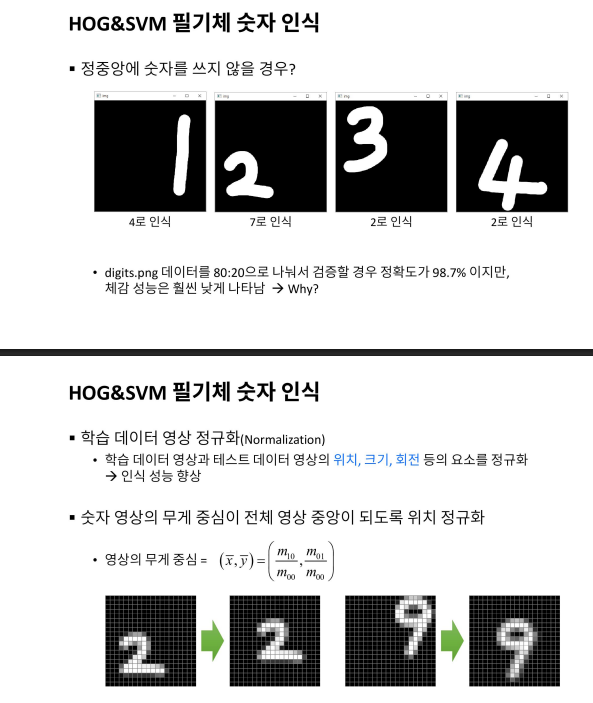

In [ ]:
# 숫자 영상 위치 정규화

import sys
import numpy as np
import cv2


oldx, oldy = -1, -1


def on_mouse(event, x, y, flags, _):
    global oldx, oldy

    if event == cv2.EVENT_LBUTTONDOWN:
        oldx, oldy = x, y

    elif event == cv2.EVENT_LBUTTONUP:
        oldx, oldy = -1, -1

    elif event == cv2.EVENT_MOUSEMOVE:
        if flags & cv2.EVENT_FLAG_LBUTTON:
            cv2.line(img, (oldx, oldy), (x, y), (255, 255, 255), 20, cv2.LINE_AA)
            oldx, oldy = x, y
            cv2.imshow('img', img)
            
def norm_digit(img):
    m = cv2.moments(img)
    cx = m['m10'] / m['m00']
    cy = m['m01'] / m['m00']
    h, w = img.shape[:2]
    aff = np.array([[1, 0, 2/w - cx], [0, 1, h/2 - cy]], dtype=np.float32)
    dst = cv2.warpAffine(img, aff, (0, 0)) # 강사님이 한거
    # dst = cv2.warpAffine(img, aff, (w, h)) # gpt가 입력 이미지 크기로 지정하게끔 수정한 거
    return dst


# 학습 데이터 & 레이블 행렬 생성 (위에서 함)

# digits = cv2.imread('images/digits.png', cv2.IMREAD_GRAYSCALE)

# if digits is None:
#     print('Image load failed!')
#     sys.exit()

# h, w = digits.shape[:2]
hog = cv2.HOGDescriptor((20, 20), (10, 10), (5, 5), (5, 5), 9)
# print('Descriptor Size:', hog.getDescriptorSize())

# cells = [np.hsplit(row, w//20) for row in np.vsplit(digits, h//20)]
# cells = np.array(cells)
# cells = cells.reshape(-1, 20, 20)  # shape=(5000, 20, 20)

# desc = []
# for img in cells:
#     desc.append(hog.compute(img))

# train_desc = np.array(desc)
# train_desc = train_desc.squeeze().astype(np.float32)
# train_labels = np.repeat(np.arange(10), len(train_desc)/10)

# 학습된 SVM 모델 불러오기

svm = cv2.ml.SVM_load('svmdigits.yml')

if svm.empty():
    print('SVM load failed!')
    sys.exit()

# 사용자 입력 영상에 대해 예측

img = np.zeros((400, 400), np.uint8)

cv2.imshow('img', img)
cv2.setMouseCallback('img', on_mouse)

while True:
    key = cv2.waitKey()

    if key == 27:
        break
    elif key == ord(' '):
        test_image = cv2.resize(img, (20, 20), interpolation=cv2.INTER_AREA)
        test_image = norm_digit(test_image) # norm_digit 추가
        test_desc = hog.compute(test_image).reshape(-1, 1).T

        _, res = svm.predict(test_desc)
        print(int(res[0, 0]))

        img.fill(0)
        cv2.imshow('img', img)

cv2.destroyAllWindows()


2
7
2
2
2


In [ ]:
import sys
import numpy as np
import cv2


oldx, oldy = -1, -1


def on_mouse(event, x, y, flags, _):
    global oldx, oldy

    if event == cv2.EVENT_LBUTTONDOWN:
        oldx, oldy = x, y

    elif event == cv2.EVENT_LBUTTONUP:
        oldx, oldy = -1, -1

    elif event == cv2.EVENT_MOUSEMOVE:
        if flags & cv2.EVENT_FLAG_LBUTTON:
            cv2.line(img, (oldx, oldy), (x, y), (255, 255, 255), 40, cv2.LINE_AA)
            oldx, oldy = x, y
            cv2.imshow('img', img)


def norm_digit(img):
    m = cv2.moments(img)
    cx = m['m10'] / m['m00']
    cy = m['m01'] / m['m00']
    h, w = img.shape[:2]
    aff = np.array([[1, 0, w/2 - cx], [0, 1, h/2 - cy]], dtype=np.float32)
    dst = cv2.warpAffine(img, aff, (0, 0))
    return dst


# 학습 데이터 & 레이블 행렬 생성

digits = cv2.imread('digits.png', cv2.IMREAD_GRAYSCALE)

if digits is None:
    print('Image load failed!')
    sys.exit()

h, w = digits.shape[:2]
hog = cv2.HOGDescriptor((20, 20), (10, 10), (5, 5), (5, 5), 9)
print('Descriptor Size:', hog.getDescriptorSize())

cells = [np.hsplit(row, w//20) for row in np.vsplit(digits, h//20)]
cells = np.array(cells)
cells = cells.reshape(-1, 20, 20)  # shape=(5000, 20, 20)

desc = []
for img in cells:
    img = norm_digit(img)
    desc.append(hog.compute(img))

train_desc = np.array(desc)
train_desc = train_desc.squeeze().astype(np.float32)
train_labels = np.repeat(np.arange(10), len(train_desc)/10)

# SVM 학습

svm = cv2.ml.SVM_create()
svm.setType(cv2.ml.SVM_C_SVC)
svm.setKernel(cv2.ml.SVM_RBF)
svm.setC(2.5)
svm.setGamma(0.50625)

svm.train(train_desc, cv2.ml.ROW_SAMPLE, train_labels)
#svm.save('svmdigits.yml')

# 사용자 입력 영상에 대해 예측

img = np.zeros((400, 400), np.uint8)

cv2.imshow('img', img)
cv2.setMouseCallback('img', on_mouse)

while True:
    key = cv2.waitKey()

    if key == 27:
        break
    elif key == ord(' '):
        test_image = cv2.resize(img, (20, 20), interpolation=cv2.INTER_AREA)
        test_image = norm_digit(test_image)
        test_desc = hog.compute(test_image).reshape(-1, 1).T

        _, res = svm.predict(test_desc)
        print(int(res[0, 0]))

        img.fill(0)
        cv2.imshow('img', img)

cv2.destroyAllWindows()


### k-평균 알고리즘
- 주어진 데이터를 k개의 구역으로 나누는 군집화 알고리즘
- 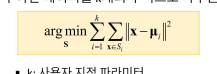

#### 동작 순서
- 1. 임의의 k개 중심을 선정
- 2. 모든 데이터에 대하여 가장 가까운 중심을 선택
- 3. 각 군집에 대해 중심을 다시 계산
- 4. 중심이 변경되면 2~3 과정을 반복
- 5. 그렇지 않으면 종료

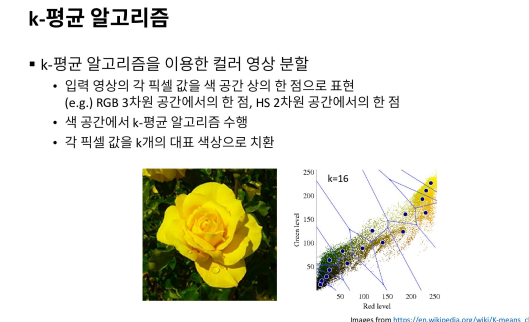

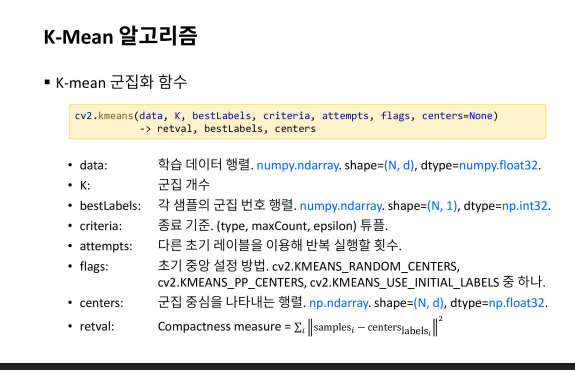

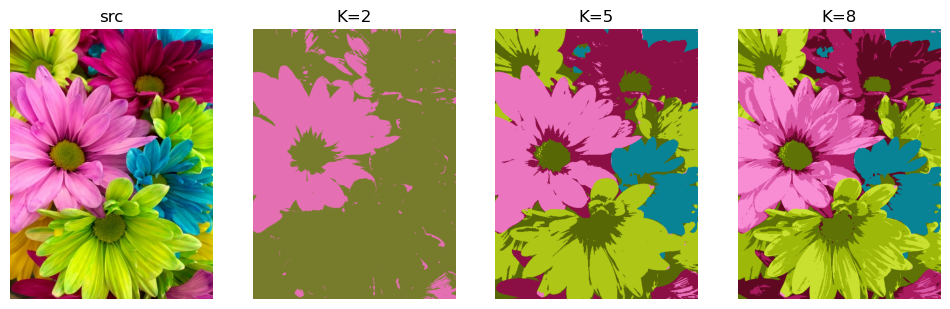

In [23]:
# k-means 알고리즘을 이용한 컬러 영상 분할 예제

src = cv2.imread('images/flowers.jpg')

data = src.reshape((-1, 3)).astype(np.float32)

criteria = (cv2.TermCriteria_EPS + cv2.TermCriteria_MAX_ITER, 10, 1.0)

for K in range(2, 9):
    ret, label, center = cv2.kmeans(data, K, None, criteria, 10, cv2.KMEANS_RANDOM_CENTERS)
    
    center = np.uint8(center)
    dst = center[label.flatten()] # 각 픽셀을 K개 군집 중심 색상으로 치환
    dst = dst.reshape((src.shape))
    
    if K==2:
        dst2 = dst
    elif K==5:
        dst5 = dst
    elif K==8:
        dst8 = dst        
        

    
#     cv2.imshow('src', src)
#     cv2.imshow('dst', dst)
#     cv2. waitKey()
    
# cv2.destroyAllWindows()

plt.figure(figsize=(12,4))
plt.subplot(141), plt.title('src'), plt.axis('off'), plt.imshow(cv2.cvtColor(src, cv2.COLOR_BGR2RGB))
plt.subplot(142), plt.title('K=2'), plt.axis('off'), plt.imshow(cv2.cvtColor(dst2, cv2.COLOR_BGR2RGB))
plt.subplot(143), plt.title('K=5'), plt.axis('off'), plt.imshow(cv2.cvtColor(dst5, cv2.COLOR_BGR2RGB))
plt.subplot(144), plt.title('K=8'), plt.axis('off'), plt.imshow(cv2.cvtColor(dst8, cv2.COLOR_BGR2RGB))
plt.show() 

### [실전 코딩] 문서 필기체 숫자 인식
- 문서에서 필기체 숫자 인식
- - 문서를 촬영 또는 스캔한 영상에서 필기체 숫자를 인식하는 프로그램

- 구현할 기술
- - 각 숫자의 부분 영상 추출
- - - 레이블링 이용 -> 각 숫자의 바운딩 박스 정보 추출
- - 숫자 부분 영상을 정규화 과정을 거쳐 20x20 크기로 resize
- - - 숫자의 바운딩 박스 부분 영상의 가로/세로 비율을 유지할 것
- - - 학습에 사용된 숫자 영상이 20x20 크기에 꽉 찬 형태가 아니므로 적절한 여백 유지
- - HOG & SVM 방법으로 숫자 인식

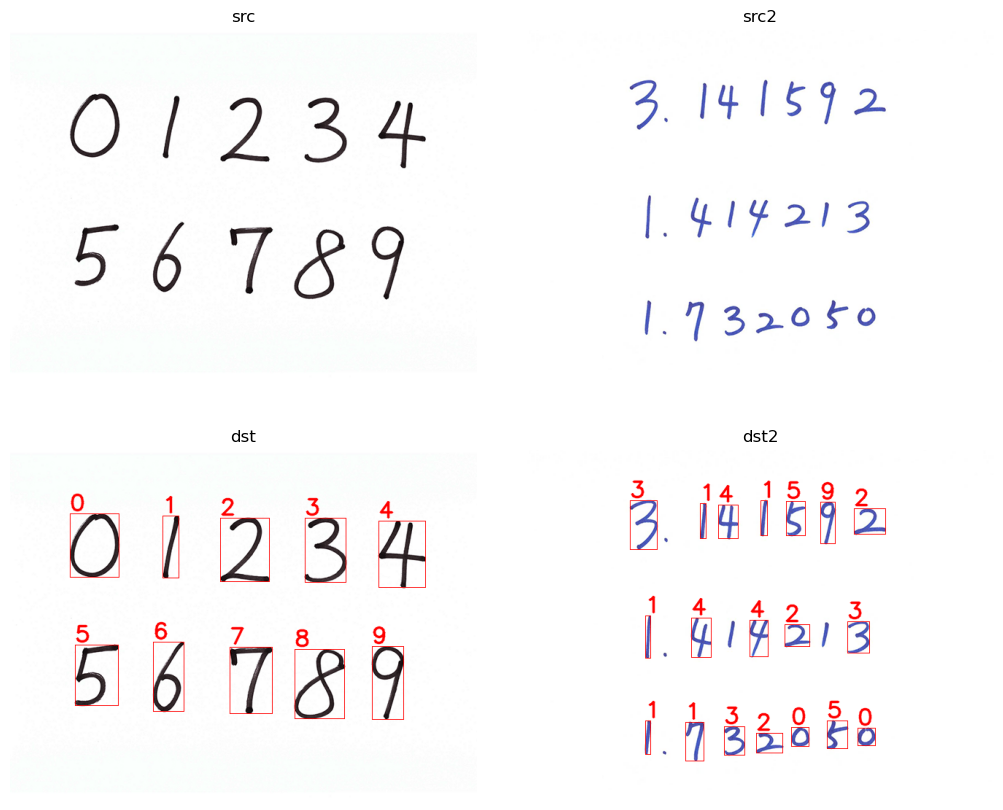

In [ ]:
import sys
import numpy as np
import cv2


# 숫자 영상을 20x20 크기 안에 적당히 들어가도록 리사이즈
def norm_img(img):
    h, w = img.shape[:2]

    img = ~img
    blr = cv2.GaussianBlur(img, (0, 0), 2)

    sf = 14. / h  # scale factor. 위/아래 3픽셀씩 여백 고려.
    if w > h:
        sf = 14. / w

    img2 = cv2.resize(img, (0, 0), fx=sf, fy=sf, interpolation=cv2.INTER_AREA)
    h2, w2 = img2.shape[:2]
    a = (20 - w2) // 2
    b = (20 - h2) // 2

    dst = np.zeros((20, 20), dtype=np.uint8)
    dst[b:b+h2, a:a+w2] = img2[:, :]

    return dst


# 입력 필기체 숫자 이미지 불러오기
src = cv2.imread('images/handwritten1.png')
src2 = cv2.imread('images/handwritten2.png')

if src is None:
    print('Image load failed!')
    sys.exit()

# HOG 객체 생성
hog = cv2.HOGDescriptor((20, 20), (10, 10), (5, 5), (5, 5), 9)

# 미리 학습된 SVM 데이터 불러오기
svm = cv2.ml.SVM_load('svmdigits.yml')

# 이진화 & 레이블링
src_gray = cv2.cvtColor(src, cv2.COLOR_BGR2GRAY)
src_gray2 = cv2.cvtColor(src2, cv2.COLOR_BGR2GRAY)

_, src_bin = cv2.threshold(src_gray, 0, 255, cv2.THRESH_BINARY_INV | cv2.THRESH_OTSU)
_, src_bin2 = cv2.threshold(src_gray2, 0, 255, cv2.THRESH_BINARY_INV | cv2.THRESH_OTSU)

cnt, _, stats, _ = cv2.connectedComponentsWithStats(src_bin)
cnt2, _, stats2, _ = cv2.connectedComponentsWithStats(src_bin2)

dst = src.copy()
dst2 = src2.copy()

for i in range(1, cnt):
    x, y, w, h, s = stats[i]

    if s < 100:
        continue
    

    # 각각의 숫자 부분 영상을 정규화한 후 HOG&SVM 숫자 인식
    digit = norm_img(src_gray[y:y+h, x:x+w])
    test_desc = hog.compute(digit).reshape(-1, 1).T
    _, res = svm.predict(test_desc)

    # HOG&SVM 숫자 인식 결과 출력
    cv2.rectangle(dst, (x, y, w, h), (0, 0, 255))
    cv2.putText(dst, str(int(res[0, 0])), (x, y - 5),
                cv2.FONT_HERSHEY_SIMPLEX, 1, (0, 0, 255), 2, cv2.LINE_AA)
    
    # cv2.imshow('dst', dst)
# cv2.waitKey()
# cv2.destroyAllWindows()

# 위 와 별개의 이미지이기 때문에 반복문 분리
for i in range(1, cnt2):
    x2, y2, w2, h2, s2 = stats2[i]
    
    if s2 <200:
        continue

    digit2 = norm_img(src_gray2[y2:y2+h2, x2:x2+w2])
    test_desc2 = hog.compute(digit2).reshape(-1, 1).T
    _, res2 = svm.predict(test_desc2)
    cv2.rectangle(dst2, (x2, y2, w2, h2), (0, 0, 255))
    cv2.putText(dst2, str(int(res2[0, 0])), (x2, y2 - 5),
                cv2.FONT_HERSHEY_SIMPLEX, 1, (0, 0, 255), 2, cv2.LINE_AA)



plt.figure(figsize=(20,10))
plt.subplot(221), plt.title('src'), plt.axis('off'), plt.imshow(cv2.cvtColor(src, cv2.COLOR_BGR2RGB))
plt.subplot(222), plt.title('src2'), plt.axis('off'), plt.imshow(cv2.cvtColor(src2, cv2.COLOR_BGR2RGB))
plt.subplot(223), plt.title('dst'), plt.axis('off'), plt.imshow(cv2.cvtColor(dst, cv2.COLOR_BGR2RGB))
plt.subplot(224), plt.title('dst2'), plt.axis('off'), plt.imshow(cv2.cvtColor(dst2, cv2.COLOR_BGR2RGB))
plt.subplots_adjust(wspace=-0.5)
plt.show() 

## 딥러닝
- 2000대부터 사용되고 있는 심층 신경망(deep neural network)의 또 다른 이름

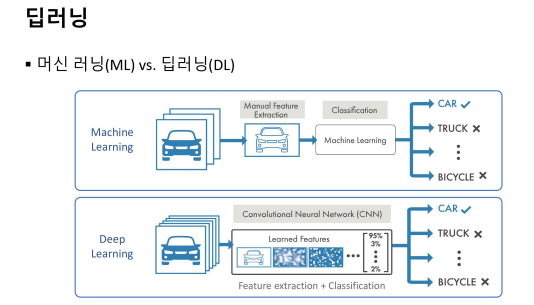

### 신경망 기초 : 퍼셉트론
- 다수의 입력으로부터 가중합을 계산하고, 이를 이용하여 하나의 출력을 만들어내는 구조(1950년대)

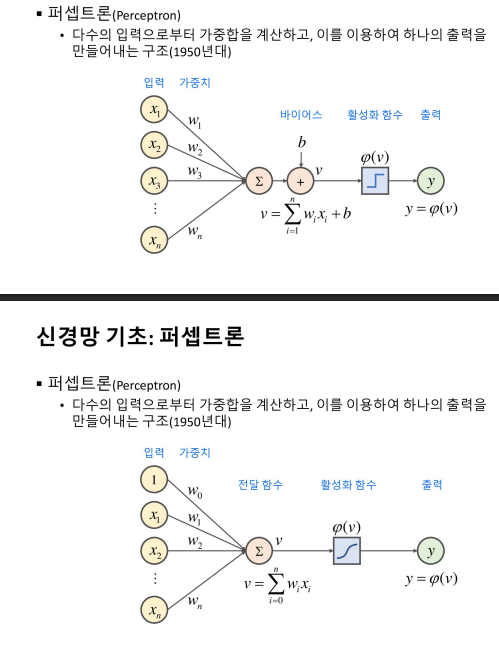

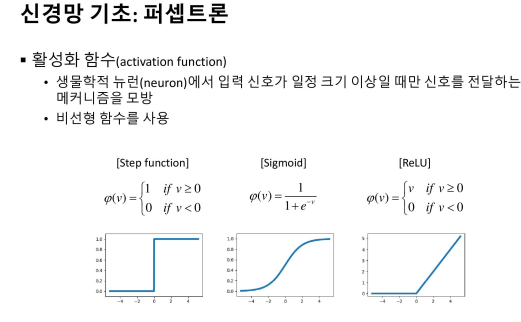

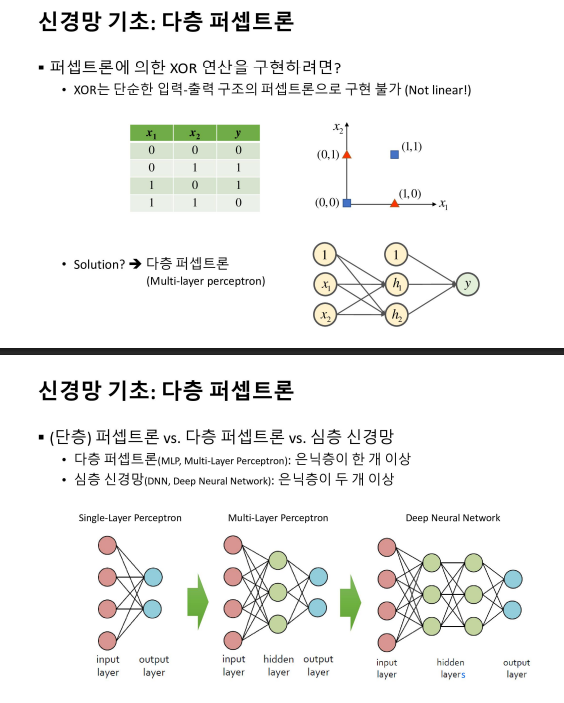

### 신경망 기초 : 학습
- 좋은 가중지를 결정하는 방법

- 신경망 학습 방법
- - 학습의 기준이되는 비용(cost) 또는 손실(loss) 함수를 정의한 후, 비용을 최소화하는 방향으로 학습을 진행
- - - 

- - 경사 하강법(gradient descent) 또는 오류역전파(error backpropagation) 알고리즘 사용
- - - 경사 하강법 : 그래디언트 반대 방향으로 이동하면서 최솟값 위치를 찾는 방법
- - - 오류 역전파 : 미분의 체인룰(chain-rule)을 이용하여 전체 가중치를 업데이트하는 방법

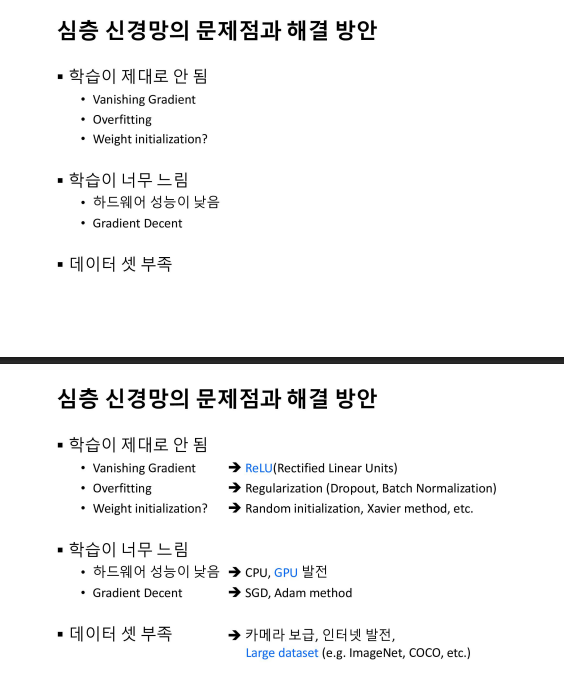

### 컨볼루션 신경망 : CNN
- #### 컨볼루션 신경망(CNN : Convolutional Neural Network)
- - 영상 인식 등을 위한 딥러닝에 특화된 네트워크 구조
- - 일반적 구성 : 컨볼루션(convolution) + 풀링(pooling) + ... + 완전 연결 레이어(FC)

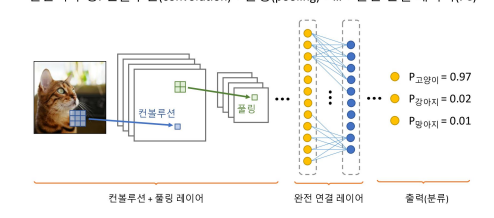

- #### 컨볼루션 레이어(Covolution Layer)
- - 2차원 영상에서 유효한 특징을 찾아내는 역할
- - 유용한 필터 마스크가 학습에 의해 결정됨
- - 보통 ReLU 활성화 함수를 함께 사용함

- #### 풀링 레이어(Pooling Layer)
- - 유용한 정보는 유지하면서 입력 크기를 줄임으로써 과적합(overfitting)을 예방하고 계산량을 감소시키는 효과
- - 최대 풀링(max pooling) 또는 평균 풀링(average pooling) 사용
- - 학습이 필요 없음

- #### 완전 연결 레이어(Fully Connected Layer)
- - 3차원 구조의 activation map(H x W x C)의 모든 값을 일렬로 이어 붙임
- - 인식의 경우, 소프트맥스(softmax) 레이어를 추가하여 각 클래스에 대한 확률 값을 결과로 얻음

#### 딥러닝 학습과 모델 파일 저장 [pass]

### OpenCV DNN 모듈
- 미리 학습된 딥러닝 모델을 이용하여 실행하는 기능
- 학습은 지원하지 않음
- - 3.3 버전부터 기본 기능으로 제공
- - 4.3 버전부터 GPU(CUDA) 지원 (소스 코드 직접 빌드 필요)

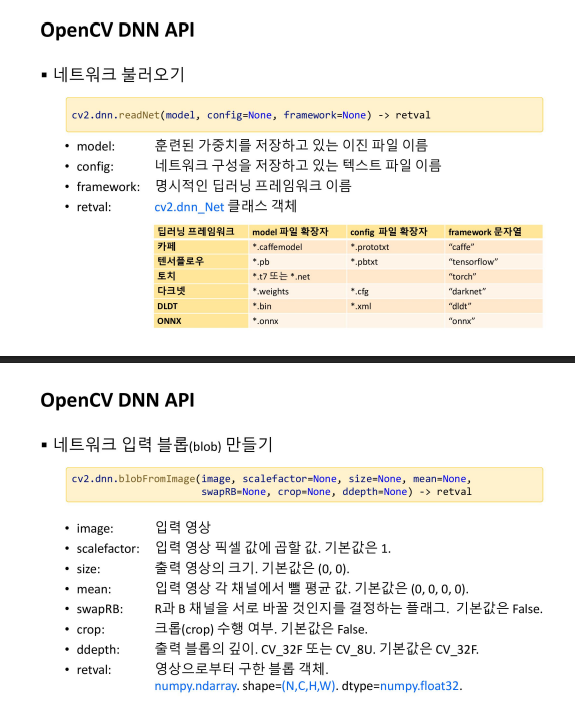

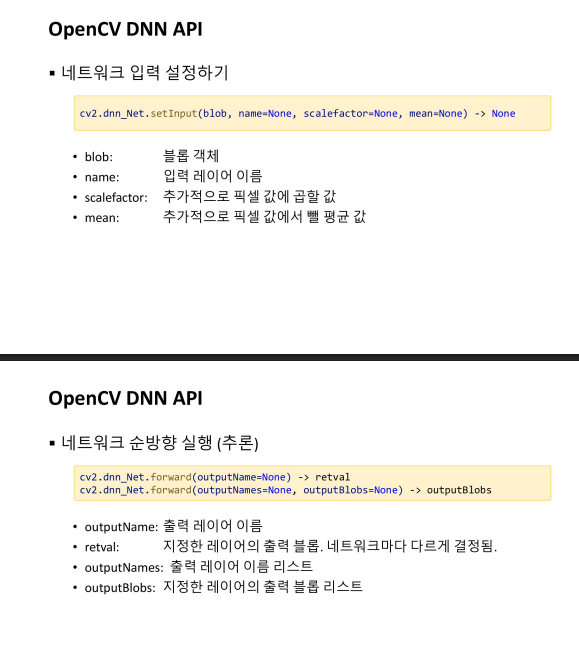

### MNIST학습 모델 사용 - dnn 모듈을 이용하여 숫자 인식

In [32]:
import sys
import numpy as np
import cv2


oldx, oldy = -1, -1


def on_mouse(event, x, y, flags, _):
    global oldx, oldy

    if event == cv2.EVENT_LBUTTONDOWN:
        oldx, oldy = x, y

    elif event == cv2.EVENT_LBUTTONUP:
        oldx, oldy = -1, -1

    elif event == cv2.EVENT_MOUSEMOVE:
        if flags & cv2.EVENT_FLAG_LBUTTON:
            cv2.line(img, (oldx, oldy), (x, y), (255, 255, 255), 20, cv2.LINE_AA)
            oldx, oldy = x, y
            cv2.imshow('img', img)


net = cv2.dnn.readNet('mnist_cnn.pb')

if net.empty():
    print('Network load failed!')
    sys.exit()

img = np.zeros((400, 400), np.uint8)

cv2.imshow('img', img)
cv2.setMouseCallback('img', on_mouse)

while True:
    c = cv2.waitKey()

    if c == 27:
        break
    elif c == ord(' '):
        blob = cv2.dnn.blobFromImage(img, 1/255., (28, 28))
        net.setInput(blob)
        prob = net.forward()

        _, maxVal, _, maxLoc = cv2.minMaxLoc(prob)
        digit = maxLoc[0]

        print(f'{digit} ({maxVal * 100:4.2f}%)')

        img.fill(0)
        cv2.imshow('img', img)

cv2.destroyAllWindows()


2 (100.00%)
7 (66.57%)
4 (80.04%)
1 (99.99%)
2 (64.56%)
6 (93.31%)
6 (100.00%)


In [34]:
import sys
import numpy as np
import cv2


oldx, oldy = -1, -1


def on_mouse(event, x, y, flags, _):
    global oldx, oldy

    if event == cv2.EVENT_LBUTTONDOWN:
        oldx, oldy = x, y

    elif event == cv2.EVENT_LBUTTONUP:
        oldx, oldy = -1, -1

    elif event == cv2.EVENT_MOUSEMOVE:
        if flags & cv2.EVENT_FLAG_LBUTTON:
            cv2.line(img, (oldx, oldy), (x, y), (255, 255, 255), 20, cv2.LINE_AA)
            oldx, oldy = x, y
            cv2.imshow('img', img)


def norm_digit(img):
    m = cv2.moments(img)
    cx = m['m10'] / m['m00']
    cy = m['m01'] / m['m00']
    h, w = img.shape[:2]
    aff = np.array([[1, 0, w/2 - cx], [0, 1, h/2 - cy]], dtype=np.float32)
    dst = cv2.warpAffine(img, aff, (0, 0))
    return dst


net = cv2.dnn.readNet('mnist_cnn.pb')

if net.empty():
    print('Network load failed!')
    sys.exit()

img = np.zeros((400, 400), np.uint8)

cv2.imshow('img', img)
cv2.setMouseCallback('img', on_mouse)

while True:
    c = cv2.waitKey()

    if c == 27:
        break
    elif c == ord(' '):
        blob = cv2.dnn.blobFromImage(norm_digit(img), 1/255., (28, 28))
        net.setInput(blob)
        prob = net.forward()

        _, maxVal, _, maxLoc = cv2.minMaxLoc(prob)
        digit = maxLoc[0]

        print(f'{digit} ({maxVal * 100:4.2f}%)')

        img.fill(0)
        cv2.imshow('img', img)

cv2.destroyAllWindows()


4 (99.15%)
2 (96.96%)
5 (63.62%)
8 (99.99%)
5 (100.00%)
1 (99.99%)
3 (100.00%)
6 (74.06%)
7 (100.00%)
9 (100.00%)
6 (100.00%)


### GoogleNet 영상 인식

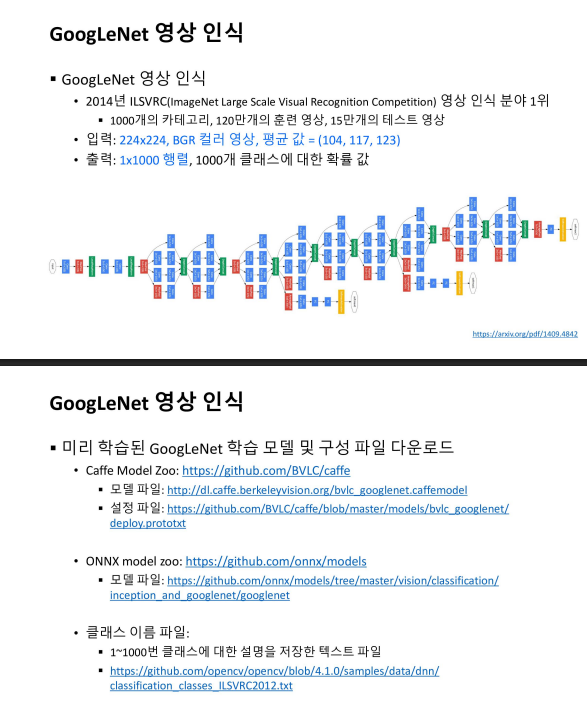

In [47]:
import sys
import numpy as np
import cv2


# 입력 영상 불러오기

filename = 'space_shuttle.jpg'

# if len(sys.argv) > 1:
#     filename = sys.argv[1]

img = cv2.imread('images/'+filename)

if img is None:
    print('Image load failed!')
    sys.exit()

# 네트워크 불러오기

# Caffe
model = 'googlenet/bvlc_googlenet.caffemodel'
# model = 'googlenet/classification_classes_ILSVRC2012'
config = 'googlenet/deploy.prototxt'

# ONNX
#model = 'googlenet/inception-v1-9.onnx'
#config = ''

net = cv2.dnn.readNet(model, config)

if net.empty():
    print('Network load failed!')
    sys.exit()

# 클래스 이름 불러오기

classNames = None
with open('googlenet/classification_classes_ILSVRC2012.txt', 'rt') as f:
    classNames = f.read().rstrip('\n').split('\n')

# 추론

blob = cv2.dnn.blobFromImage(img, 1, (224, 224), (104, 117, 123))
net.setInput(blob)
prob = net.forward()

# 추론 결과 확인 & 화면 출력

out = prob.flatten()
classId = np.argmax(out)
confidence = out[classId]

text = f'{classNames[classId]} ({confidence * 100:4.2f}%)'
cv2.putText(img, text, (10, 30), cv2.FONT_HERSHEY_SIMPLEX, 0.8, (0, 0, 255), 1, cv2.LINE_AA)

cv2.imshow('img', img)
cv2.waitKey()
cv2.destroyAllWindows()


### [실전 코딩] 한글 손글씨 인식

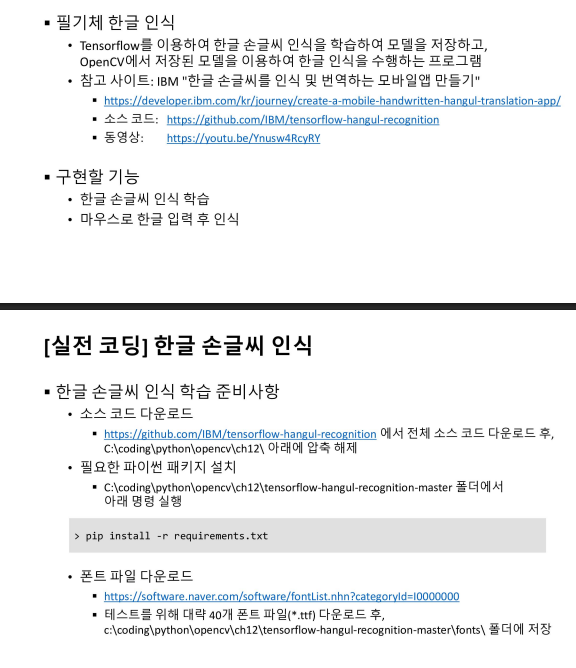

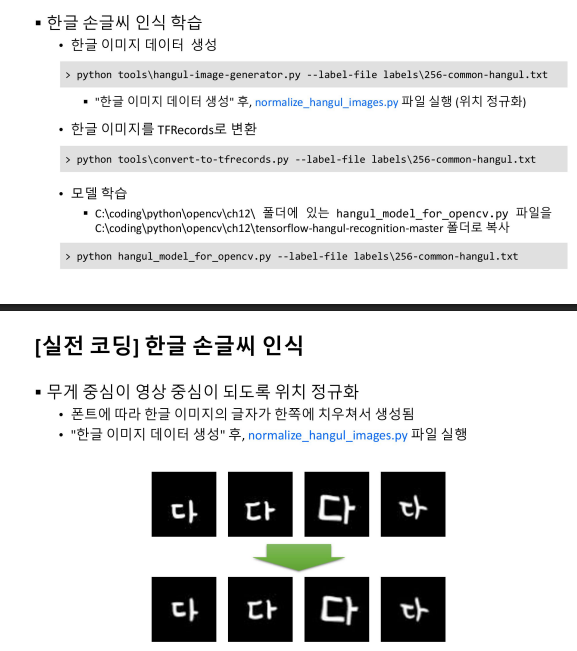

In [ ]:
# tensorflow 폴더에 있음

### openCV DNN 얼굴 검출

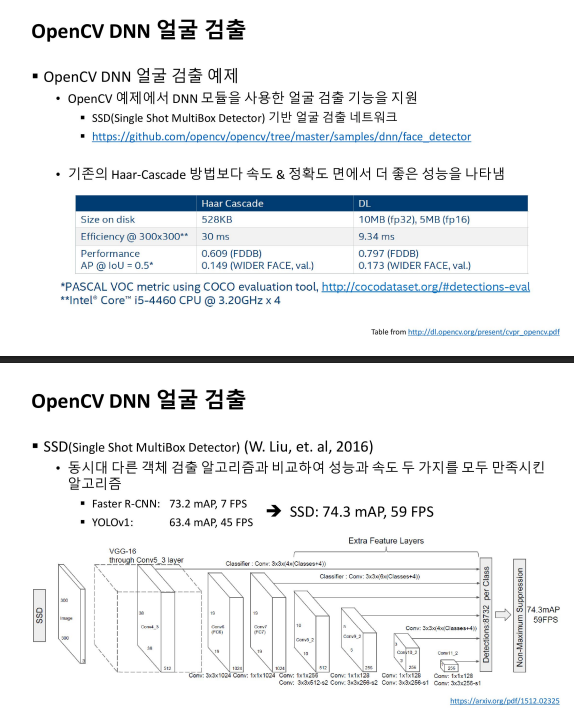

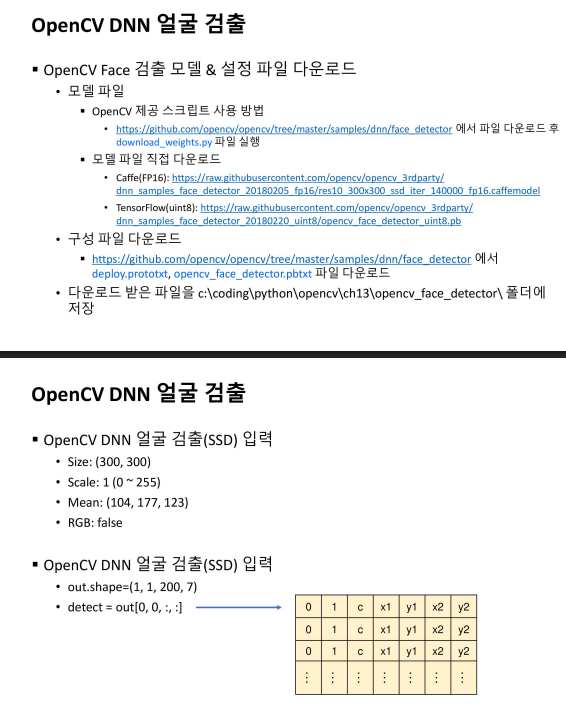

In [ ]:
# 예제는 opencv_face_detector 폴더에

### YOLOv3 객체 검출

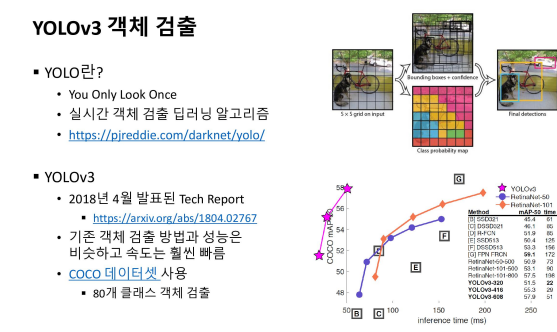

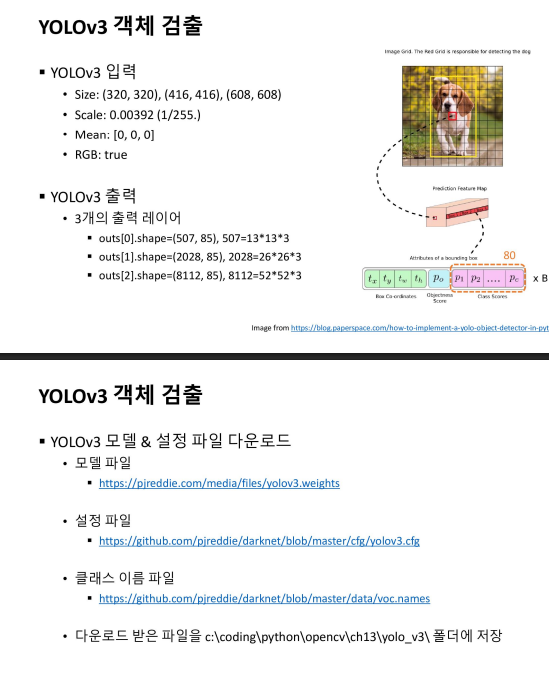

In [ ]:
# 예제는 yolo_v3 폴더에

### Mask-RCNN 영역 분할

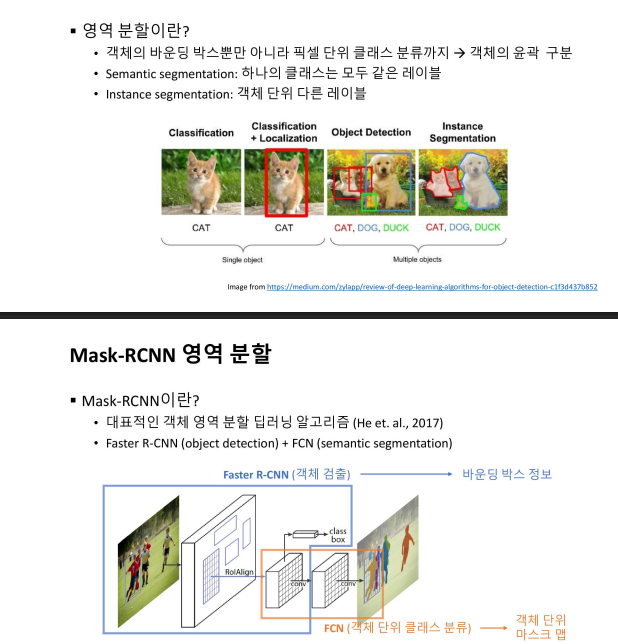

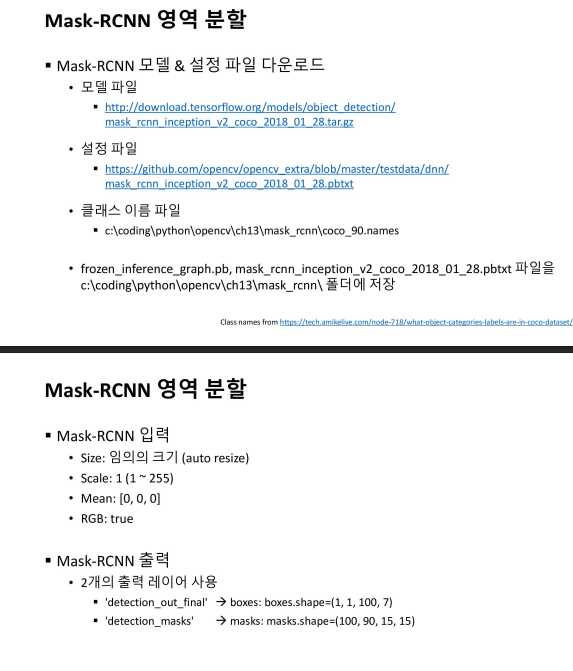

In [ ]:
# mask_rcnn 폴더 예제

### OpenPose : 포즈 인식

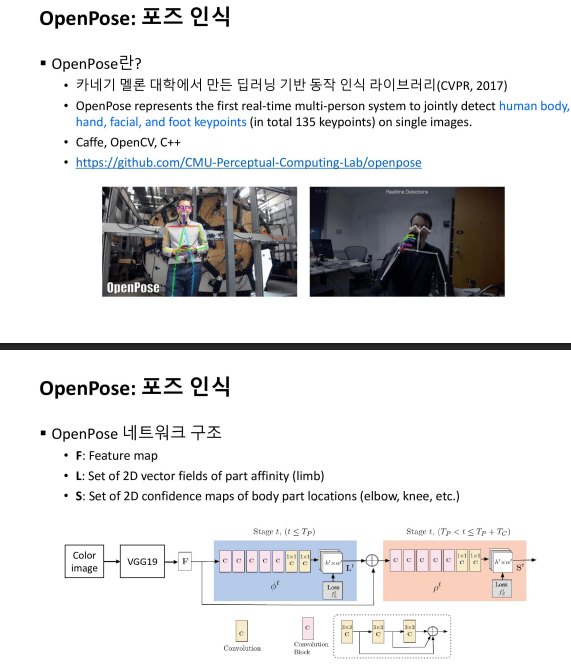

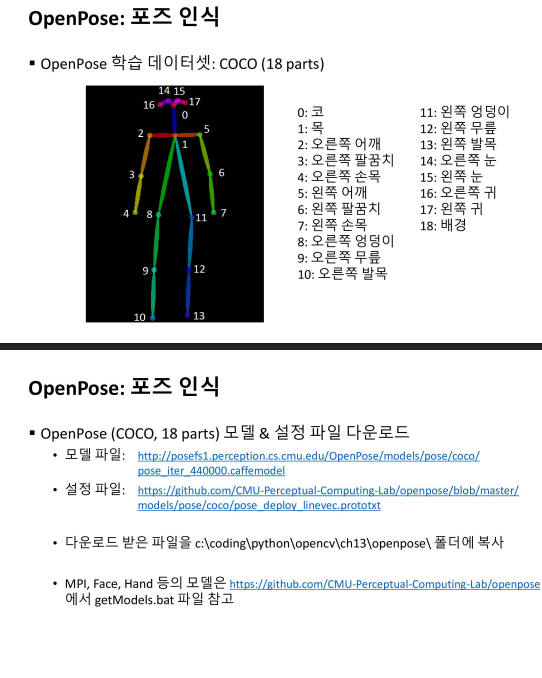

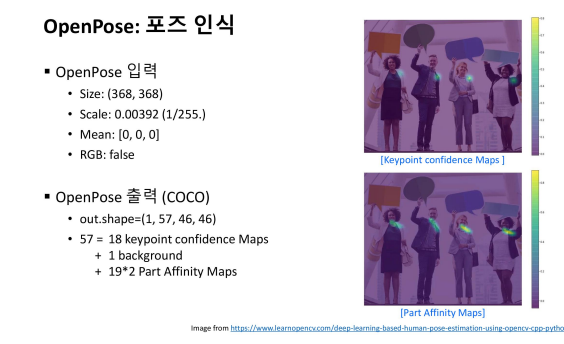

In [ ]:
# 예제는 openpose 폴더에

### EAST : 문자 영역 검출

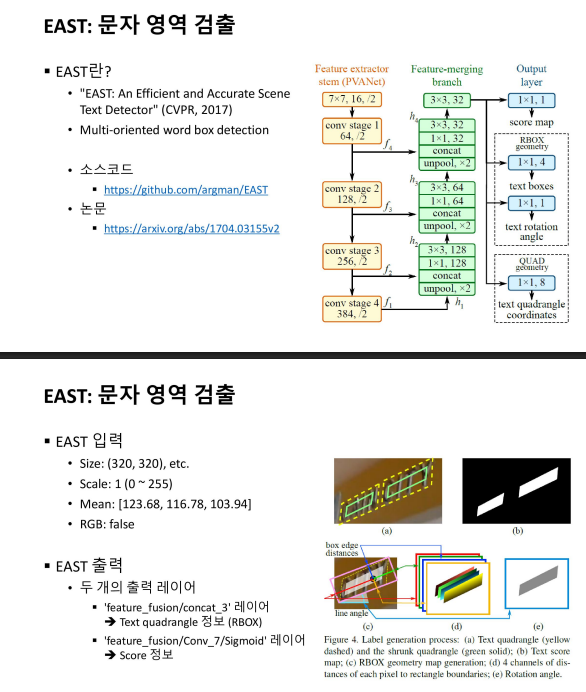

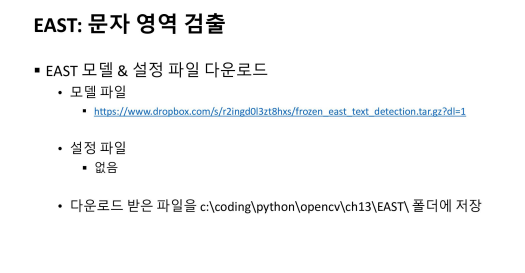

In [ ]:
# 예제는 EAST 폴더에